In [2]:
import pandas as pd
#import chardet
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import numpy as np
#from ydata_profiling import ProfileReport

# Encoding solution to import the data

In [626]:
# with open('sdd.csv', 'rb') as file:
#     result = chardet.detect(file.read())
#     encoding = result['encoding']

In [627]:
#encoding

In [3]:
df = pd.read_csv('sdd.csv', encoding='Windows-1252')

# Deliverable 📬
A notebook with:
* descriptive statistics
* visualisations
* captions and interpretations on how the stats and visualisations are relevant to why people agree to a second date

## EDA

In [4]:
#profile = ProfileReport(df, title="EDA report")

In [5]:
#profile.to_notebook_iframe() #very long to load
#profile.to_widgets()

## What the opposite sex say it looks for the most in a potential date

In [8]:
qu1 = df[['gender', 'attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1', 'shar2_1']] 

In [9]:
qu1

,gender,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1
0,0,35.0,20.0,15.0,20.0,5.0,5.0
1,0,35.0,20.0,15.0,20.0,5.0,5.0
2,0,35.0,20.0,15.0,20.0,5.0,5.0
3,0,35.0,20.0,15.0,20.0,5.0,5.0
4,0,35.0,20.0,15.0,20.0,5.0,5.0
...,...,...,...,...,...,...,...
8373,1,50.0,0.0,0.0,30.0,0.0,20.0
8374,1,50.0,0.0,0.0,30.0,0.0,20.0
8375,1,50.0,0.0,0.0,30.0,0.0,20.0
8376,1,50.0,0.0,0.0,30.0,0.0,20.0


In [10]:
qu1.dropna(inplace=True)

/var/folders/lt/pb3vc41d15l30zltrtdn76b00000gn/T/ipykernel_5425/1090546342.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qu1.dropna(inplace=True)


In [11]:
qu1.isna().sum()

gender      0
attr2_1     0
sinc2_1     0
intel2_1    0
fun2_1      0
amb2_1      0
shar2_1     0
dtype: int64

In [12]:
# just checking if values make sense
for column in ['attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1', 'shar2_1']:
    print(f"Unique values in {column}: {qu1[column].unique()}")

Unique values in attr2_1: [ 35.    65.    50.    30.    25.    45.    20.    10.    40.    95.
  70.    55.    60.    32.    15.    17.    18.    80.    16.    22.
  22.73  24.32  20.51  18.75  14.89  18.37  19.61  15.56  19.05  19.57
  17.86  22.22  23.81  28.57  23.53  16.67  21.95  18.87  23.26  15.22
  14.81  14.29  14.55  13.04  21.88   9.09  21.74  13.64  17.78  17.39
  14.58  17.07  18.6   19.23  23.68  16.36  15.79  15.09  16.98  12.77
  14.    26.32  25.64  31.25  17.02  25.71  21.43  20.93  22.5   18.18
  11.63  12.24  15.38  15.69  27.59  19.51  19.15  75.    90.    13.
  19.    68.    39.    21.    33.   100.     0.  ]
Unique values in sinc2_1: [20.    0.   10.   12.    5.   15.   16.    1.   30.   25.   18.   14.
 50.   21.   15.91 16.22 15.38 16.67 17.02 18.37 19.61 17.78  7.14 13.04
 16.07 15.56 13.33 12.5   8.57 14.29 13.51 17.65 14.63 15.09 16.28 19.57
 18.52 20.41 18.18 15.63 20.45 15.22 17.39 18.75 17.07 11.11 11.36 13.64
 18.6  11.32 21.05 13.16 18.87 16.98 19.15 17

In [697]:
mean_qu1 = qu1.groupby('gender')[['attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1', 'shar2_1']].mean()
median_qu1 = qu1.groupby('gender')[['attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1', 'shar2_1']].median()

In [701]:
mean_qu1

,Attractiveness,Sincerity,Intelligence,Fun,Ambition,SharedInterest
gender,,,,,,
female,35.694349,11.343646,12.532022,18.733510,9.230638,12.645113
male,25.008799,15.169505,16.294714,18.134868,14.234815,11.071924


In [702]:
median_qu1

,Attractiveness,Sincerity,Intelligence,Fun,Ambition,SharedInterest
gender,,,,,,
female,30.0,10.0,11.36,20.00,10.0,11.9
male,20.0,15.0,16.28,19.57,15.0,10.0


In [700]:
mean_qu1 = mean_qu1.rename(index={0: 'female', 1: 'male'}, 
                 columns={'attr2_1': 'Attractiveness', 
                          'sinc2_1': 'Sincerity', 
                          'intel2_1': 'Intelligence', 
                          'fun2_1': 'Fun', 
                          'amb2_1': 'Ambition',
                          'shar2_1': 'SharedInterest'})
median_qu1 = median_qu1.rename(index={0: 'female', 1: 'male'}, 
                 columns={'attr2_1': 'Attractiveness', 
                          'sinc2_1': 'Sincerity', 
                          'intel2_1': 'Intelligence', 
                          'fun2_1': 'Fun', 
                          'amb2_1': 'Ambition',
                          'shar2_1': 'SharedInterest'})

lets plot using median_qu1

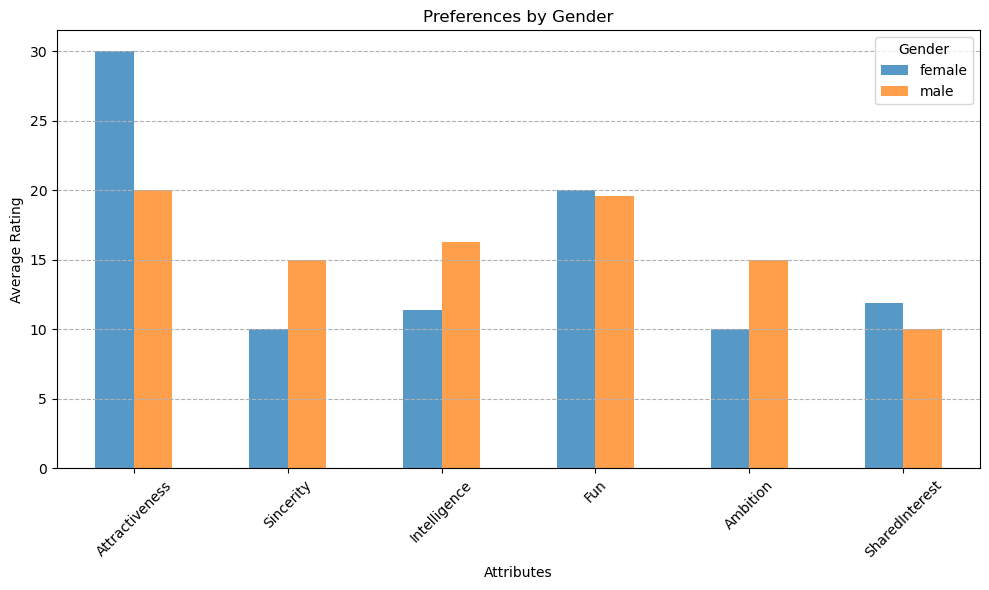

In [711]:
# Plotting
median_qu1.T.plot(kind='bar', figsize=(10, 6), alpha=0.75, rot=45)
plt.title('Preferences by Gender')
plt.ylabel('Average Rating')
plt.xlabel('Attributes')
plt.grid(axis='y', linestyle='--')
plt.legend(title='Gender')
plt.tight_layout()

plt.show()

## Impact of match expectation VS reality

In [14]:
#removing the NaN from the['expnum'] column
qu2 = df.dropna(subset=['expnum'])

In [16]:
# Summarize the actual number of matches for each participant
# reset_index is cool because it also return a panda and allow to give a name for the column
match_counts = df.groupby('iid')['match'].sum().reset_index(name='actual_matches')

# Merge with left join so we only keep the rows that were identified on the left with the one matching on right
qu2 = pd.merge(qu2, match_counts, on='iid', how='left')

In [17]:
match_counts

,iid,actual_matches
0,1,4
1,2,2
2,3,0
3,4,2
4,5,2
...,...,...
546,548,5
547,549,5
548,550,4
549,551,2


In [643]:
# Since 'expnum' is the same for all rows of the same participant, we'll drop duplicates
qu2 = qu2[['iid', 'expnum', 'actual_matches']].drop_duplicates()

# Calculate the correlation between expected and actual matches
correlation = qu2['expnum'].corr(qu2['actual_matches'])

In [644]:
qu2

,iid,expnum,actual_matches
0,1,2.0,4
10,2,5.0,2
20,3,2.0,0
30,4,2.0,2
40,5,10.0,2
...,...,...,...
1750,127,20.0,4
1760,128,13.0,6
1770,129,10.0,3
1780,130,1.0,2


In [645]:
# Assuming df_unique contains unique rows for each participant with 'expnum' and 'actual_matches'
fig = px.scatter(qu2, x='expnum', y='actual_matches', trendline='ols',
                 labels={'expnum': 'Expected Number of Matches', 'actual_matches': 'Actual Number of Matches'},
                 title='Relationship Between Expected and Actual Number of Matches')

fig.update_layout(xaxis_title='Expected Number of Matches',
                  yaxis_title='Actual Number of Matches',
                  title={'text': "Expected vs. Actual Number of Matches",
                         'y':0.9,
                         'x':0.5,
                         'xanchor': 'center',
                         'yanchor': 'top'})

# Show plot
fig.show()


In [646]:
correlation

0.24301754177986376

Setting high or low expectations does not significantly influence match success, as evidenced by a very low correlation. This indicates that the outcome of matches remains unaffected by the level of expectations participants set.

In [647]:
# improve the scatter plot
#qu2 = qu2.groupby(qu2['actual_matches'])['expnum'].mean().reset_index()
qu2 = qu2.groupby(qu2['expnum'])['actual_matches'].mean().reset_index()

In [648]:
qu2

,expnum,actual_matches
0,0.0,0.750000
1,1.0,2.111111
2,2.0,1.894737
3,3.0,3.000000
4,4.0,3.285714
5,5.0,2.266667
6,6.0,2.800000
7,7.0,4.000000
8,8.0,3.666667
9,9.0,1.333333


In [649]:
fig = px.scatter(qu2, x='expnum', y='actual_matches', trendline='ols',
                 labels={'expnum': 'Expected Number of Matches', 'actual_matches': 'Actual Number of Matches'},
                 title='Relationship Between Expected and Actual Number of Matches')

fig.update_layout(xaxis_title='Expected Number of Matches',
                  yaxis_title='Actual Number of Matches',
                  title={'text': "Expected vs. Actual Number of Matches",
                         'y':0.9,
                         'x':0.5,
                         'xanchor': 'center',
                         'yanchor': 'top'})

# Show plot
fig.show()

## What partners think of themselves VS reality

In [650]:
# checking if values make sense
df['attr3_1'].max(), df['sinc3_1'].max(), df['fun3_1'].max(), df['amb3_1'].max()

(10.0, 10.0, 10.0, 10.0)

In [651]:
# Select relevant columns
ratings_self = df[['iid', 'attr3_1', 'sinc3_1', 'fun3_1', 'amb3_1']]
ratings_by_partner = df[['iid', 'pid', 'attr_o', 'sinc_o', 'fun_o', 'amb_o']]

In [652]:
ratings_self

,iid,attr3_1,sinc3_1,fun3_1,amb3_1
0,1,6.0,8.0,8.0,7.0
1,1,6.0,8.0,8.0,7.0
2,1,6.0,8.0,8.0,7.0
3,1,6.0,8.0,8.0,7.0
4,1,6.0,8.0,8.0,7.0
...,...,...,...,...,...
8373,552,8.0,7.0,6.0,7.0
8374,552,8.0,7.0,6.0,7.0
8375,552,8.0,7.0,6.0,7.0
8376,552,8.0,7.0,6.0,7.0


In [653]:
average_self_ratings = ratings_self.groupby('iid').mean().reset_index()

In [654]:
average_self_ratings

,iid,attr3_1,sinc3_1,fun3_1,amb3_1
0,1,6.0,8.0,8.0,7.0
1,2,7.0,5.0,10.0,3.0
2,3,8.0,9.0,8.0,8.0
3,4,7.0,8.0,9.0,8.0
4,5,6.0,3.0,6.0,8.0
...,...,...,...,...,...
546,548,10.0,10.0,10.0,10.0
547,549,7.0,10.0,8.0,9.0
548,550,7.0,7.0,7.0,7.0
549,551,7.0,8.0,3.0,5.0


In [655]:
ratings_by_partner

,iid,pid,attr_o,sinc_o,fun_o,amb_o
0,1,11.0,6.0,8.0,8.0,8.0
1,1,12.0,7.0,8.0,7.0,7.0
2,1,13.0,10.0,10.0,10.0,10.0
3,1,14.0,7.0,8.0,8.0,9.0
4,1,15.0,8.0,7.0,6.0,9.0
...,...,...,...,...,...,...
8373,552,526.0,10.0,5.0,2.0,6.0
8374,552,527.0,6.0,3.0,3.0,7.0
8375,552,528.0,2.0,1.0,2.0,2.0
8376,552,529.0,5.0,7.0,5.0,3.0


In [656]:
# Merge to align partner ratings with participant IDs
ratings_by_partner = ratings_by_partner.rename(columns={'iid': 'pid', 'pid': 'iid'})
merged_ratings = pd.merge(average_self_ratings, ratings_by_partner, on='iid')

In [657]:
merged_ratings

,iid,attr3_1,sinc3_1,fun3_1,amb3_1,pid,attr_o,sinc_o,fun_o,amb_o
0,1,6.0,8.0,8.0,7.0,11,6.0,9.0,7.0,6.0
1,1,6.0,8.0,8.0,7.0,12,7.0,8.0,8.0,5.0
2,1,6.0,8.0,8.0,7.0,13,5.0,8.0,8.0,5.0
3,1,6.0,8.0,8.0,7.0,14,7.0,6.0,7.0,6.0
4,1,6.0,8.0,8.0,7.0,15,5.0,6.0,7.0,6.0
...,...,...,...,...,...,...,...,...,...,...
8363,552,8.0,7.0,6.0,7.0,526,3.0,5.0,5.0,NaN
8364,552,8.0,7.0,6.0,7.0,527,4.0,6.0,4.0,4.0
8365,552,8.0,7.0,6.0,7.0,528,4.0,7.0,8.0,8.0
8366,552,8.0,7.0,6.0,7.0,529,4.0,6.0,4.0,NaN


In [658]:
average_partner_ratings = merged_ratings.groupby('iid')[['attr_o', 'sinc_o', 'fun_o', 'amb_o']].mean().reset_index()

In [659]:
average_partner_ratings

,iid,attr_o,sinc_o,fun_o,amb_o
0,1,5.700000,7.300000,6.800000,6.300000
1,2,6.400000,7.000000,6.100000,6.500000
2,3,8.100000,8.600000,7.700000,8.800000
3,4,6.400000,8.900000,7.800000,7.800000
4,5,6.300000,6.000000,6.000000,5.600000
...,...,...,...,...,...
546,548,4.476190,6.714286,4.476190,3.904762
547,549,4.590909,7.045455,6.727273,6.863636
548,550,5.636364,5.954545,5.500000,5.045455
549,551,6.350000,7.100000,6.700000,6.700000


In [660]:
comparison_df = pd.merge(average_self_ratings, average_partner_ratings, on='iid')

In [661]:
comparison_df

,iid,attr3_1,sinc3_1,fun3_1,amb3_1,attr_o,sinc_o,fun_o,amb_o
0,1,6.0,8.0,8.0,7.0,5.700000,7.300000,6.800000,6.300000
1,2,7.0,5.0,10.0,3.0,6.400000,7.000000,6.100000,6.500000
2,3,8.0,9.0,8.0,8.0,8.100000,8.600000,7.700000,8.800000
3,4,7.0,8.0,9.0,8.0,6.400000,8.900000,7.800000,7.800000
4,5,6.0,3.0,6.0,8.0,6.300000,6.000000,6.000000,5.600000
...,...,...,...,...,...,...,...,...,...
546,548,10.0,10.0,10.0,10.0,4.476190,6.714286,4.476190,3.904762
547,549,7.0,10.0,8.0,9.0,4.590909,7.045455,6.727273,6.863636
548,550,7.0,7.0,7.0,7.0,5.636364,5.954545,5.500000,5.045455
549,551,7.0,8.0,3.0,5.0,6.350000,7.100000,6.700000,6.700000


In [662]:
#! THIS CELL IS NOT USED IN THE ANALYSIS
########################################

# Calculate differences for each attribute
comparison_df['attr_diff'] = comparison_df['attr3_1'] - comparison_df['attr_o']
comparison_df['sinc_diff'] = comparison_df['sinc3_1'] - comparison_df['sinc_o']
comparison_df['fun_diff'] = comparison_df['fun3_1'] - comparison_df['fun_o']
comparison_df['amb_diff'] = comparison_df['amb3_1'] - comparison_df['amb_o']

# Display the average differences
average_differences = comparison_df[['attr_diff', 'sinc_diff', 'fun_diff', 'amb_diff']].mean()

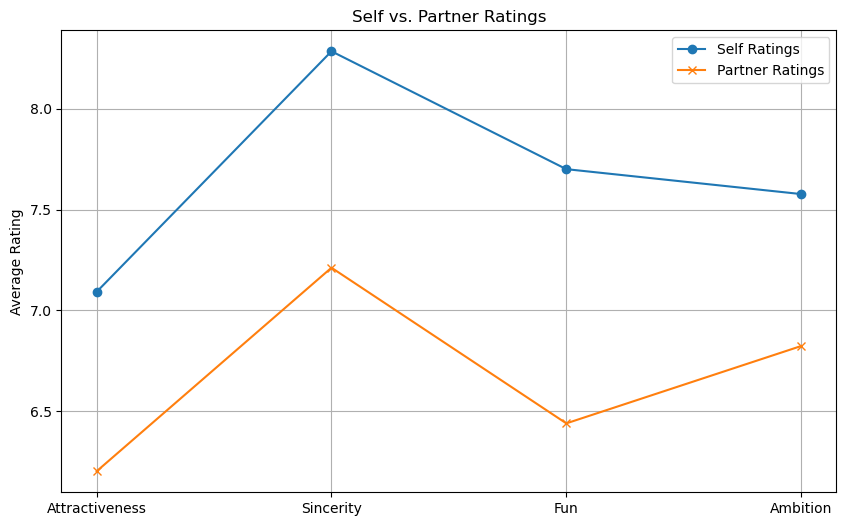

In [664]:
# Assuming average_differences is correctly calculated
attributes = ['Attractiveness', 'Sincerity', 'Fun', 'Ambition']
self_means = comparison_df[['attr3_1', 'sinc3_1', 'fun3_1', 'amb3_1']].mean()
partner_means = comparison_df[['attr_o', 'sinc_o', 'fun_o', 'amb_o']].mean()

x = range(len(attributes))
plt.figure(figsize=(10, 6))
plt.plot(x, self_means, label='Self Ratings', marker='o')
plt.plot(x, partner_means, label='Partner Ratings', marker='x')
plt.xticks(x, attributes)
plt.ylabel('Average Rating')
plt.title('Self vs. Partner Ratings')
plt.legend()
plt.grid(True)
plt.show()

## Do you need money to get the lady ?

In [18]:
#type(df['tuition'].loc[4000]) #str
#type(df['income'].loc[1]) #str
#type(df['mn_sat'].loc[4000]) #str
df['tuition'].isna().sum(), df['income'].isna().sum(), df['mn_sat'].isna().sum()

(4795, 4099, 5245)

In [24]:
df.shape

(8378, 195)

Not enough data available

## What are the sexy job to get a match per gender?

In [30]:
# checking value missing for the relevant features
df['career_c'].isna().sum(), df['field_cd'].isna().sum()

(138, 82)

In [31]:
job_df = df.dropna(subset=['career_c', 'field_cd', 'gender', 'match']) #drop rows where either x & y is NaN

In [32]:
job_df = job_df[['career_c', 'field_cd', 'gender', 'match']] 

In [33]:
job_df.head()

,career_c,field_cd,gender,match
30,1.0,1.0,0,0
31,1.0,1.0,0,0
32,1.0,1.0,0,0
33,1.0,1.0,0,1
34,1.0,1.0,0,0


In [34]:
# using data instructons to do the mapping
career_mapping = {
    1.0: 'Lawyer',
    2.0: 'Academic',
    3.0: 'Psychologist',
    4.0: 'Medicine',
    5.0: 'Engineer',
    6.0: 'Entertainment',
    7.0: 'Banking/CEO',
    8.0: 'Real Estate',
    9.0: 'International Affairs',
    10.0: 'Undecided',
    11.0: 'Social Work',
    12.0: 'Speech Pathology',
    13.0: 'Politics',
    14.0: 'Sport',
    15.0: 'Other',
    16.0: 'Journalism',
    17.0: 'Architecture'
}

field_mapping = {
    1: 'Law',
    2: 'Math',
    3: 'Social Science',
    4: 'Medical Science',
    5: 'Engineering',
    6: 'Journalism',
    7: 'History',
    8: 'Business',
    9: 'Education',
    10: 'Biological Sciences',
    11: 'Social Work',
    12: 'Undergrad',
    13: 'Political Science',
    14: 'Film',
    15: 'Fine Arts',
    16: 'Languages',
    17: 'Architecture',
    18: 'Other'
}

job_df['career_code'] = job_df['career_c'].map(career_mapping)
job_df['field_code'] = job_df['field_cd'].map(field_mapping)

In [35]:
job_df_female = job_df[job_df['gender'] == 0]
job_df_male = job_df[job_df['gender'] == 1]

In [36]:
career_match_rate_female = job_df_female.groupby('career_code')['match'].sum().sort_values(ascending=False).reset_index()
career_match_rate_male = job_df_male.groupby('career_code')['match'].sum().sort_values(ascending=False).reset_index()
field_match_rate_female = job_df_female.groupby('field_code')['match'].sum().sort_values(ascending=False).reset_index()
field_match_rate_male = job_df_male.groupby('field_code')['match'].sum().sort_values(ascending=False).reset_index()

In [37]:
career_match_rate_female

,career_code,match
0,Academic,203
1,Banking/CEO,112
2,Entertainment,60
3,International Affairs,59
4,Lawyer,55
5,Medicine,47
6,Psychologist,46
7,Social Work,35
8,Undecided,34
9,Engineer,12


In [38]:
fig = go.Figure(data=[
    go.Bar(name='Female', x=career_match_rate_female['career_code'], y=career_match_rate_female['match'], marker_color='pink'),
    go.Bar(name='Male', x=career_match_rate_male['career_code'], y=career_match_rate_male['match'], marker_color='blue')
])

# Update the layout for a cleaner look
fig.update_layout(barmode='group', title='Career Match Rates by Gender',
                  xaxis_title='Career Code', yaxis_title='Number of Matches',
                  legend_title='Gender')
fig.show()


Are job equally distributed? is the data fair? I dont think so... lets see

In [39]:
job_df['career_code'].value_counts()

career_code
Academic                 2320
Banking/CEO              2170
Entertainment             724
Lawyer                    675
International Affairs     547
Medicine                  421
Undecided                 379
Psychologist              261
Engineer                  234
Social Work               220
Politics                   81
Other                      77
Journalism                 44
Real Estate                39
Speech Pathology           28
Sport                      10
Architecture               10
Name: count, dtype: int64

In [40]:
job_carrer_count_female = job_df_female['career_code'].value_counts()
job_carrer_count_male = job_df_male['career_code'].value_counts()
job_field_count_female = job_df_female['field_code'].value_counts()
job_field_count_male = job_df_male['field_code'].value_counts()

In [41]:
job_carrer_count_female

career_code
Academic                 1278
Banking/CEO               589
International Affairs     401
Entertainment             398
Lawyer                    255
Medicine                  244
Psychologist              241
Undecided                 232
Social Work               220
Engineer                  101
Journalism                 44
Politics                   40
Speech Pathology           28
Other                      14
Name: count, dtype: int64

In [42]:
# Calculate match rate as a percentage using sum [671] and count from [675]
career_match_rate_female['match_rate'] = (career_match_rate_female['match'] / job_carrer_count_female.loc[career_match_rate_female['career_code']].values) * 100
career_match_rate_male['match_rate'] = (career_match_rate_male['match'] / job_carrer_count_male.loc[career_match_rate_male['career_code']].values) * 100

field_match_rate_male['match_rate'] = (field_match_rate_male['match'] / job_field_count_male.loc[field_match_rate_male['field_code']].values) * 100
field_match_rate_female['match_rate'] = (field_match_rate_female['match'] / job_field_count_female.loc[field_match_rate_female['field_code']].values) * 100

In [43]:
career_match_rate_female

,career_code,match,match_rate
0,Academic,203,15.884194
1,Banking/CEO,112,19.015280
2,Entertainment,60,15.075377
3,International Affairs,59,14.713217
4,Lawyer,55,21.568627
5,Medicine,47,19.262295
6,Psychologist,46,19.087137
7,Social Work,35,15.909091
8,Undecided,34,14.655172
9,Engineer,12,11.881188


In [44]:
# Merge DataFrames on career_code
merged_career_match_rates = pd.merge(career_match_rate_female[['career_code', 'match_rate']],
                                     career_match_rate_male[['career_code', 'match_rate']],
                                     on='career_code', suffixes=('_female', '_male'))

# Sort (must pick one of the column to sort, cannot to do both so lady's first)
merged_career_match_rates = merged_career_match_rates.sort_values(by='match_rate_female', ascending=False)

In [45]:
merged_career_match_rates

,career_code,match_rate_female,match_rate_male
4,Lawyer,21.568627,18.809524
5,Medicine,19.262295,12.994350
6,Psychologist,19.087137,40.000000
1,Banking/CEO,19.015280,17.583808
0,Academic,15.884194,15.067179
2,Entertainment,15.075377,16.871166
3,International Affairs,14.713217,13.698630
7,Undecided,14.655172,9.523810
8,Engineer,11.881188,18.045113
9,Other,7.142857,19.047619


In [47]:
fig = go.Figure(data=[
    go.Bar(name='Female', x=merged_career_match_rates['career_code'], y=merged_career_match_rates['match_rate_female'], marker_color='pink'),
    go.Bar(name='Male', x=merged_career_match_rates['career_code'], y=merged_career_match_rates['match_rate_male'], marker_color='blue')
])

# Update the layout for a cleaner look
fig.update_layout(
    barmode='group',
    title='Career Match Rates by Gender',
    xaxis_title='Career Code',
    yaxis_title='Match Rate (%)',
    legend_title='Gender'
    #xaxis={'categoryorder':'total descending'}
)
fig.show()

I dont see any big difference by gender (yes the psy is standing out) so lets do this without gender seperation

In [48]:
job_df

,career_c,field_cd,gender,match,career_code,field_code
30,1.0,1.0,0,0,Lawyer,Law
31,1.0,1.0,0,0,Lawyer,Law
32,1.0,1.0,0,0,Lawyer,Law
33,1.0,1.0,0,1,Lawyer,Law
34,1.0,1.0,0,0,Lawyer,Law
...,...,...,...,...,...,...
8373,15.0,18.0,1,0,Other,Other
8374,15.0,18.0,1,0,Other,Other
8375,15.0,18.0,1,0,Other,Other
8376,15.0,18.0,1,0,Other,Other


In [49]:
job_career_count = job_df['career_code'].value_counts()
job_field_count = job_df['field_code'].value_counts()
job_career_matches = job_df.groupby('career_code')['match'].sum()
job_field_matches = job_df.groupby('field_code')['match'].sum()

In [50]:
job_career_count

career_code
Academic                 2320
Banking/CEO              2170
Entertainment             724
Lawyer                    675
International Affairs     547
Medicine                  421
Undecided                 379
Psychologist              261
Engineer                  234
Social Work               220
Politics                   81
Other                      77
Journalism                 44
Real Estate                39
Speech Pathology           28
Sport                      10
Architecture               10
Name: count, dtype: int64

In [51]:
job_career_matches

career_code
Academic                 360
Architecture               1
Banking/CEO              390
Engineer                  36
Entertainment            115
International Affairs     79
Journalism                 8
Lawyer                   134
Medicine                  70
Other                     13
Politics                   6
Psychologist              54
Real Estate                5
Social Work               35
Speech Pathology           1
Sport                      3
Undecided                 48
Name: match, dtype: int64

In [52]:
career_match_rate = (job_career_matches / job_career_count) * 100
career_match_rate = career_match_rate.reset_index().rename(columns={0: 'match_rate'})

# Sort by match rate for better visualization
career_match_rate = career_match_rate.sort_values('match_rate', ascending=False)
career_match_rate

,career_code,match_rate
15,Sport,30.000000
11,Psychologist,20.689655
7,Lawyer,19.851852
6,Journalism,18.181818
2,Banking/CEO,17.972350
9,Other,16.883117
8,Medicine,16.627078
13,Social Work,15.909091
4,Entertainment,15.883978
0,Academic,15.517241


In [56]:
# Creating the bar chart
fig = go.Figure(go.Bar(
    x=career_match_rate['match_rate'],
    y=career_match_rate['career_code'],
    orientation='h',  # Horizontal bar chart
    marker=dict(color=career_match_rate['match_rate'], colorscale='Viridis')  # Coloring based on match rate
))

In [58]:
# Update layout
fig.update_layout(
    title='Carrer Match Rates Sorted by Success',
    xaxis_title='Match Rate (%)',
    yaxis_title='Field Code',
    yaxis={'categoryorder':'total ascending'}  # Ensure the bars are sorted
)
# Show plot
fig.show()

In [53]:
field_match_rate = (job_field_matches / job_field_count) * 100
field_match_rate = field_match_rate.reset_index().rename(columns={0: 'match_rate'})

# Sort by match rate for better visualization
field_match_rate = field_match_rate.sort_values('match_rate', ascending=False)
field_match_rate

,field_code,match_rate
12,Medical Science,32.167832
9,Languages,30.000000
10,Law,20.155039
15,Social Science,18.676471
5,Film,18.253968
2,Business,17.597911
14,Political Science,16.784203
7,History,16.597510
1,Biological Sciences,16.213494
13,Other,15.384615


In [54]:
# Creating the bar chart
fig = go.Figure(go.Bar(
    x=field_match_rate['match_rate'],
    y=field_match_rate['field_code'],
    orientation='h',  # Horizontal bar chart
    marker=dict(color=field_match_rate['match_rate'], colorscale='Viridis')  # Coloring based on match rate
))

In [55]:
# Update layout
fig.update_layout(
    title='Field Match Rates Sorted by Success',
    xaxis_title='Match Rate (%)',
    yaxis_title='Field Code',
    yaxis={'categoryorder':'total ascending'}  # Ensure the bars are sorted
)
# Show plot
fig.show()

## Does seeking a serious relationship lead to more matches?

In [85]:
goal_df = df[['goal', 'match']] 

In [86]:
df['goal'].value_counts()

goal
1.0    3426
2.0    3012
3.0     631
5.0     510
6.0     419
4.0     301
Name: count, dtype: int64

In [87]:
goal_df = goal_df.groupby('goal').mean().reset_index()

In [88]:
goal_df

,goal,match
0,1.0,0.170169
1,2.0,0.160691
2,3.0,0.158479
3,4.0,0.169435
4,5.0,0.166667
5,6.0,0.147971


In [89]:
goal_names = {1: 'Fun night out', 2: 'Meet new people', 3: 'Get a date', 4: 'Serious relationship', 5: 'Try', 6: 'Other'}

In [90]:
goal_df['goal_code'] = goal_df['goal'].map(goal_names)

In [91]:
goal_df

,goal,match,goal_code
0,1.0,0.170169,Fun night out
1,2.0,0.160691,Meet new people
2,3.0,0.158479,Get a date
3,4.0,0.169435,Serious relationship
4,5.0,0.166667,Try
5,6.0,0.147971,Other


In [92]:
fig = go.Figure(
    data = go.Bar(
        x = goal_df['goal_code'],
        y = goal_df['match']),
    layout = go.Layout(
        title = go.layout.Title(text = "Goal of dating"),
        yaxis = go.layout.YAxis(title = "Match"),
    )
)

fig.show()

## Does dating frequency affect success in speed dating?

In [99]:
xp_date_df = df.groupby(df['date'])['match'].mean().reset_index()

In [100]:
xp_date_df

,date,match
0,1.0,0.308511
1,2.0,0.211039
2,3.0,0.203065
3,4.0,0.178922
4,5.0,0.155105
5,6.0,0.141834
6,7.0,0.147838


In [101]:
xp_date_df['date'].corr(xp_date_df['match'])

-0.8918764873800423

In [102]:
rename_xp = {
1: "Several times a week",
2: "Twice a week",
3: "Once a week",
4: "Twice a month",
5: "Once a month",
6: "Several times a year",
7: "Almost never"}

xp_date_df['XP'] = xp_date_df['date'].map(rename_xp).reset_index(drop=True)

In [97]:
xp_date_df

,date,match,XP
0,1.0,0.308511,Several times a week
1,2.0,0.211039,Twice a week
2,3.0,0.203065,Once a week
3,4.0,0.178922,Twice a month
4,5.0,0.155105,Once a month
5,6.0,0.141834,Several times a year
6,7.0,0.147838,Almost never


In [103]:
# Creating a histogram
fig = px.bar(xp_date_df, x='XP', y='match', title='Match Rate by Date Frequency',
             labels={'date': 'Date Frequency', 'match': 'Match Rate'},
             text='match')

fig.update_traces(texttemplate='%{text:.2%}', textposition='outside')
fig.update_layout(xaxis_title='Date Frequency',
                  yaxis_title='Match Rate')
fig.show()

my note: in a binary column, the mean value is the proportion of 1s.